# 개요

## 분류 목적
- 환자의 다양한 건강상태를 기반으로 흡연 여부 판단
- 분석지표 : ROC curve

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [66]:
train = pd.read_csv('/content/drive/MyDrive/멋사/파이널/smoker_classification/train.csv')
test = pd.read_csv('/content/drive/MyDrive/멋사/파이널/smoker_classification/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/멋사/파이널/smoker_classification/sample_submission.csv')

In [67]:
train.shape, test.shape, submission.shape

((159256, 24), (106171, 23), (106171, 2))

In [68]:
origin_train = pd.read_csv('/content/drive/MyDrive/멋사/파이널/smoker_classification/original_train_dataset.csv')


In [9]:
origin_train.shape

(38984, 23)

In [10]:
origin_train.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [11]:
train.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

## 원본데이터, 대회데이터 병합

In [69]:
concat_train = pd.concat([train, origin_train], axis=0)

In [13]:
concat_train.shape

(198240, 24)

- 총 198240개의 학습 데이터 생성

## 데이터 상세
- 환자의 나이, 키 몸무게, 신체사이즈, 시력, 청력, 혈압, 등의 건강정보 및 흡연여부 총 23개의 피쳐, 1개의 타겟
- 타겟 데이터를 smoking(흡연여부)

In [14]:
concat_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198240 entries, 0 to 38983
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  float64
 1   age                  198240 non-null  int64  
 2   height(cm)           198240 non-null  int64  
 3   weight(kg)           198240 non-null  int64  
 4   waist(cm)            198240 non-null  float64
 5   eyesight(left)       198240 non-null  float64
 6   eyesight(right)      198240 non-null  float64
 7   hearing(left)        198240 non-null  int64  
 8   hearing(right)       198240 non-null  int64  
 9   systolic             198240 non-null  int64  
 10  relaxation           198240 non-null  int64  
 11  fasting blood sugar  198240 non-null  int64  
 12  Cholesterol          198240 non-null  int64  
 13  triglyceride         198240 non-null  int64  
 14  HDL                  198240 non-null  int64  
 15  LDL                  19

- waist, eyesight, hemoglobin, serum creatinine 의 5개의 float 데이터와 나머지는 int형

## 만들어 낼 수있는 새로운 피쳐

- 추후에 학습 성능이 좋지 않으면 추가해서 진행
- 참고 링크 : https://www.kaggle.com/competitions/playground-series-s3e24/discussion/450314

### BMI
- 몸무게와 키의 비율
- weight / (height/100)^2
  - 18.5 - 24.99 : 정상
  - 25 - 29.99 : 과체중
  - 30 - 34.99 : 비만 1단계
  - 35 - 39.99 : 비만 2단계
  - 40이상 : 비만 3단계

#### 나이에따른 위험도
- 45세 미만 : 저위험
- 45세 이상 : 고위험

#### 혈압수치
- Systolic : 수축 혈압
- relaxation : 이완 혈압

- sys < 120 OR relaxation < 80 : 보통
- sys 120 - 129 OR relaxion 80 - 89 : 위험
- sys 130 - 139 OR relaxation 90 - 99 : 고혈압 1단계
- sys 140 - 179 OR relaxation 100 - 119 : 고혈압 2단계
- sys >= 180 OR relaxation >= 120 : 고혈압 3단계 (매우 위험)

##### 콜레스테롤 수치

- 100 미만 : 이상적
- 100 -129 : 위험 없음
- 130 - 159 : 위험 경계치
- 160 - 189 : 높음
- 190 이상 : 매우 높음

##### HDL

- 40미만 : 고위험
- 40 - 60 : 정상
- 60이상 : 저위험

##### LDL

- 100미만 : 최고상태
- 100 - 129 : 좋음
- 130 - 159 : 위험 경계치
- 160 - 189 : 높음
- 190 : 매우 높음

##### 중성지방(Triglyceride) 수치

- 150미만 : 정상
- 150 - 199 : 가벼운 위험
- 200 - 499 : 위험
- 500이상 : 고위험

# EDA

In [15]:
concat_train.isnull().sum()

id                     38984
age                        0
height(cm)                 0
weight(kg)                 0
waist(cm)                  0
eyesight(left)             0
eyesight(right)            0
hearing(left)              0
hearing(right)             0
systolic                   0
relaxation                 0
fasting blood sugar        0
Cholesterol                0
triglyceride               0
HDL                        0
LDL                        0
hemoglobin                 0
Urine protein              0
serum creatinine           0
AST                        0
ALT                        0
Gtp                        0
dental caries              0
smoking                    0
dtype: int64

- 결측치 없음
- id 는 원본데이터에 존재하지 않아서 나오는 값

In [16]:
concat_train.duplicated().sum()

5517

- 중복 학습 데이터 5517개

In [70]:
final_train = concat_train.drop_duplicates()
final_test = test
final_train.shape, final_test.shape

((192723, 24), (106171, 23))

- 중복데이터 삭제후 테스트, 트레인 데이터

In [19]:
def cus_describe(df):
  table = pd.DataFrame()
  table['Data Type'] = df.dtypes
  table['Unique Values'] = df.nunique().values
  print(table)

cus_describe(final_train)

                    Data Type  Unique Values
id                    float64         159256
age                     int64             18
height(cm)              int64             15
weight(kg)              int64             29
waist(cm)             float64            548
eyesight(left)        float64             20
eyesight(right)       float64             18
hearing(left)           int64              2
hearing(right)          int64              2
systolic                int64            128
relaxation              int64             94
fasting blood sugar     int64            259
Cholesterol             int64            279
triglyceride            int64            393
HDL                     int64            123
LDL                     int64            286
hemoglobin            float64            144
Urine protein           int64              6
serum creatinine      float64             34
AST                     int64            196
ALT                     int64            230
Gtp       

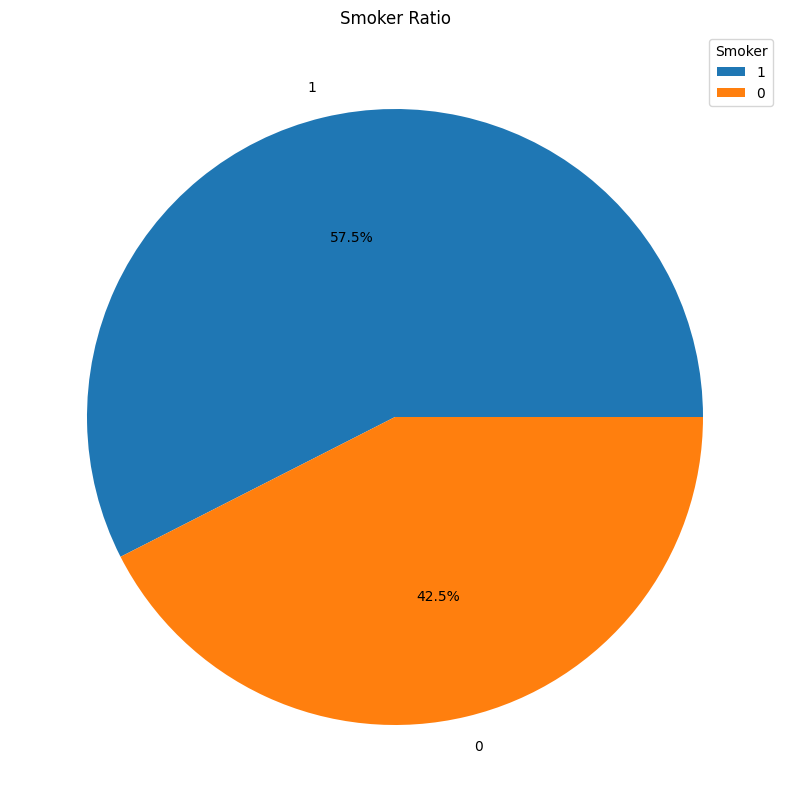

In [20]:
plt.figure(figsize=(10,10))
plt.pie(final_train['smoking'].value_counts(),
        labels=final_train['smoking'].unique(), autopct='%1.1f%%')
plt.title('Smoker Ratio')
plt.legend(title='Smoker', loc = 'best')
plt.show()

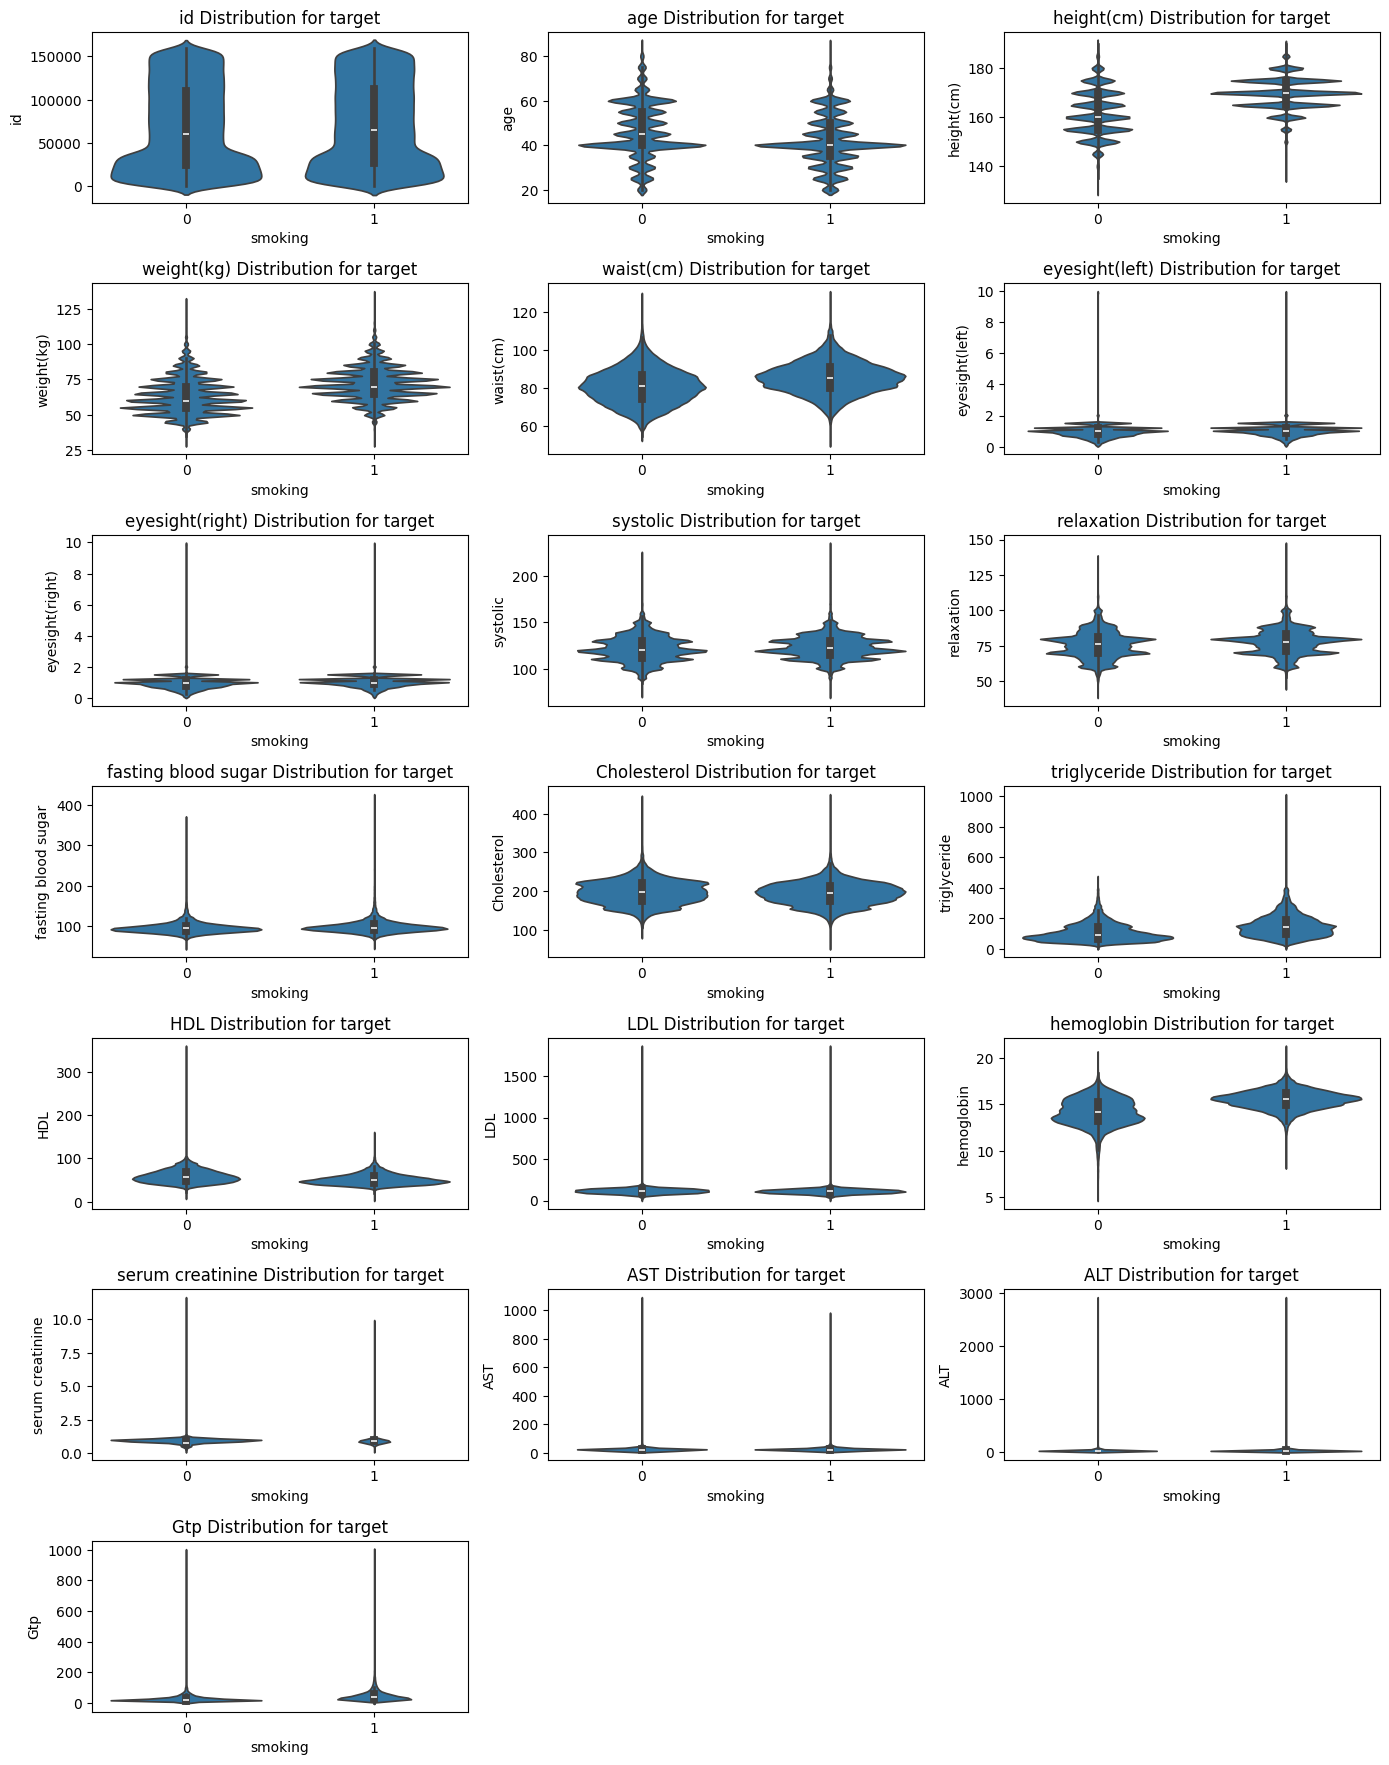

In [23]:
target = 'smoking'
full_features = final_test.columns
num_var = [column for column in final_test.columns if final_test[column].nunique() > 10]
cat_var = [column for column in final_test.columns if final_test[column].nunique() < 10]
num_rows = len(num_var)
num_cols = 3

total_plots = num_rows * num_cols
plt.figure(figsize=(14, num_rows * 2.5))

for idx, col in enumerate(num_var):
  plt.subplot(num_rows, num_cols, idx % total_plots + 1)
  sns.violinplot(x=target, y=col, data=final_train)
  plt.title(f"{col} Distribution for target")

plt.tight_layout()
plt.show()

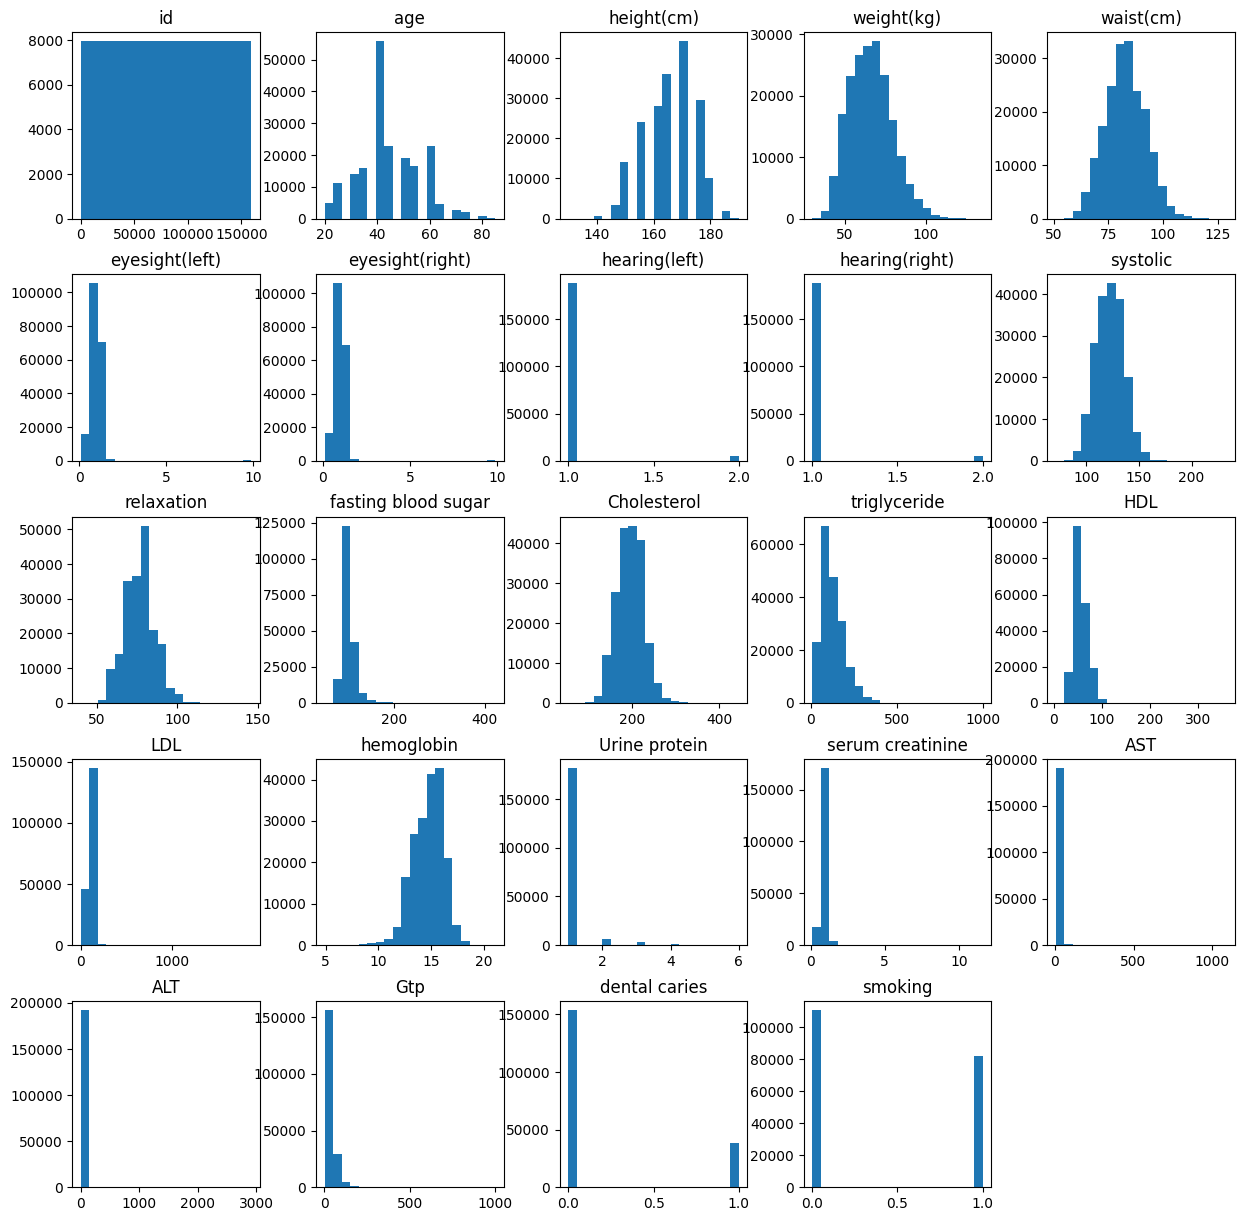

In [24]:
final_train.hist(figsize=(15,15), bins=20, grid=False)
plt.show()

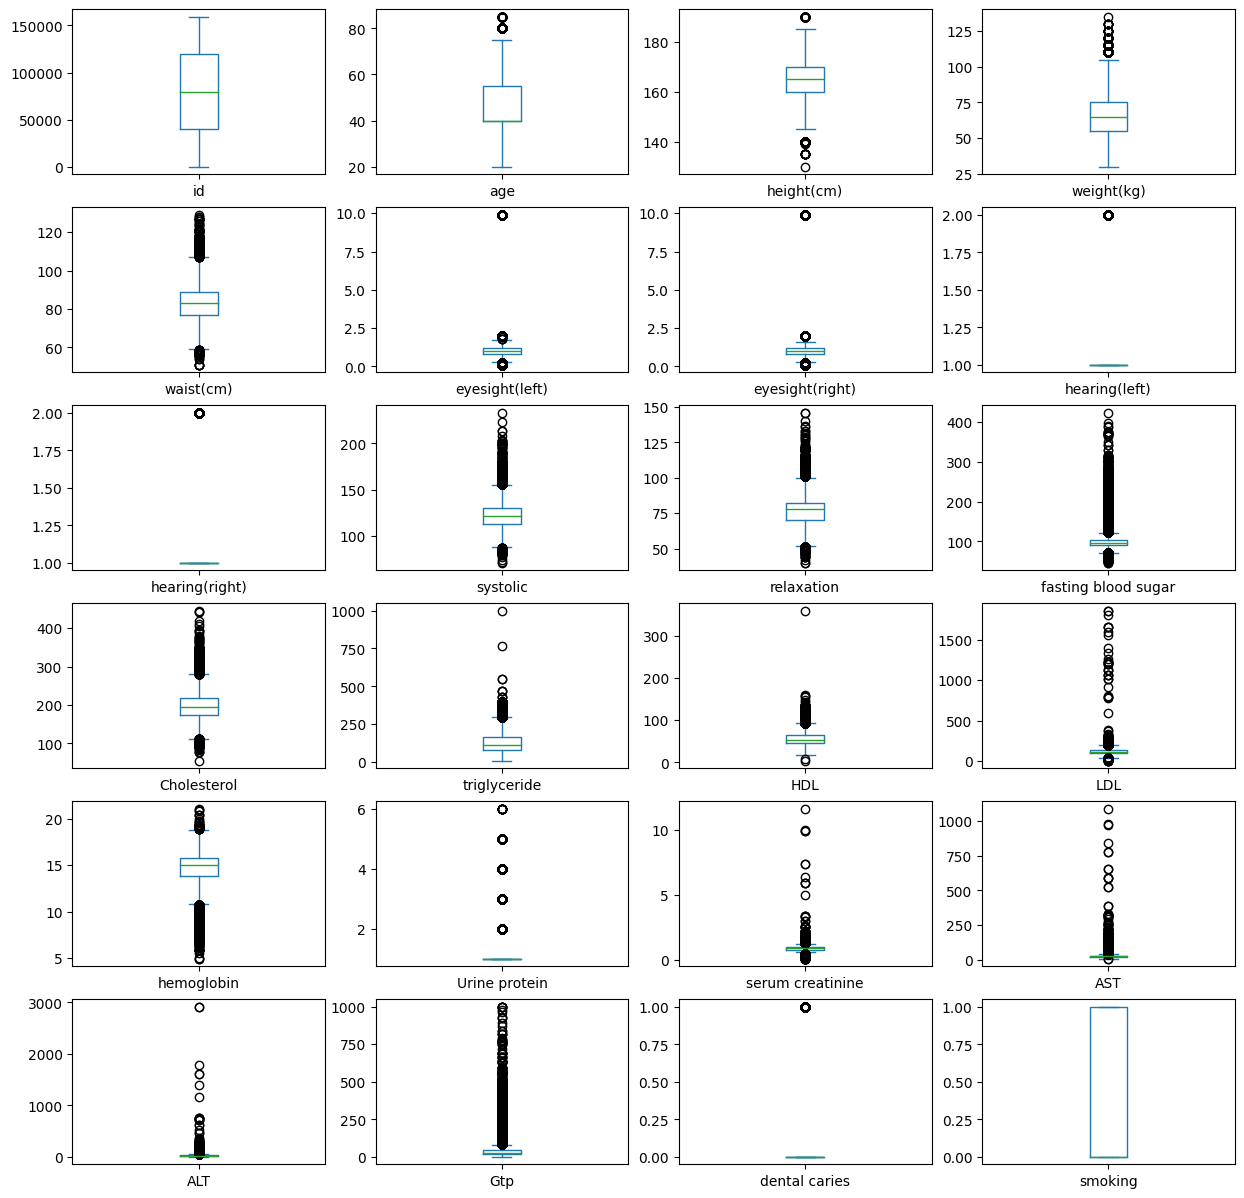

In [25]:
final_train.plot(kind='box', subplots=True, layout=(6,4), figsize=(15,15))
plt.show()

- 이상치가 많음을 확인할 수 있음

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

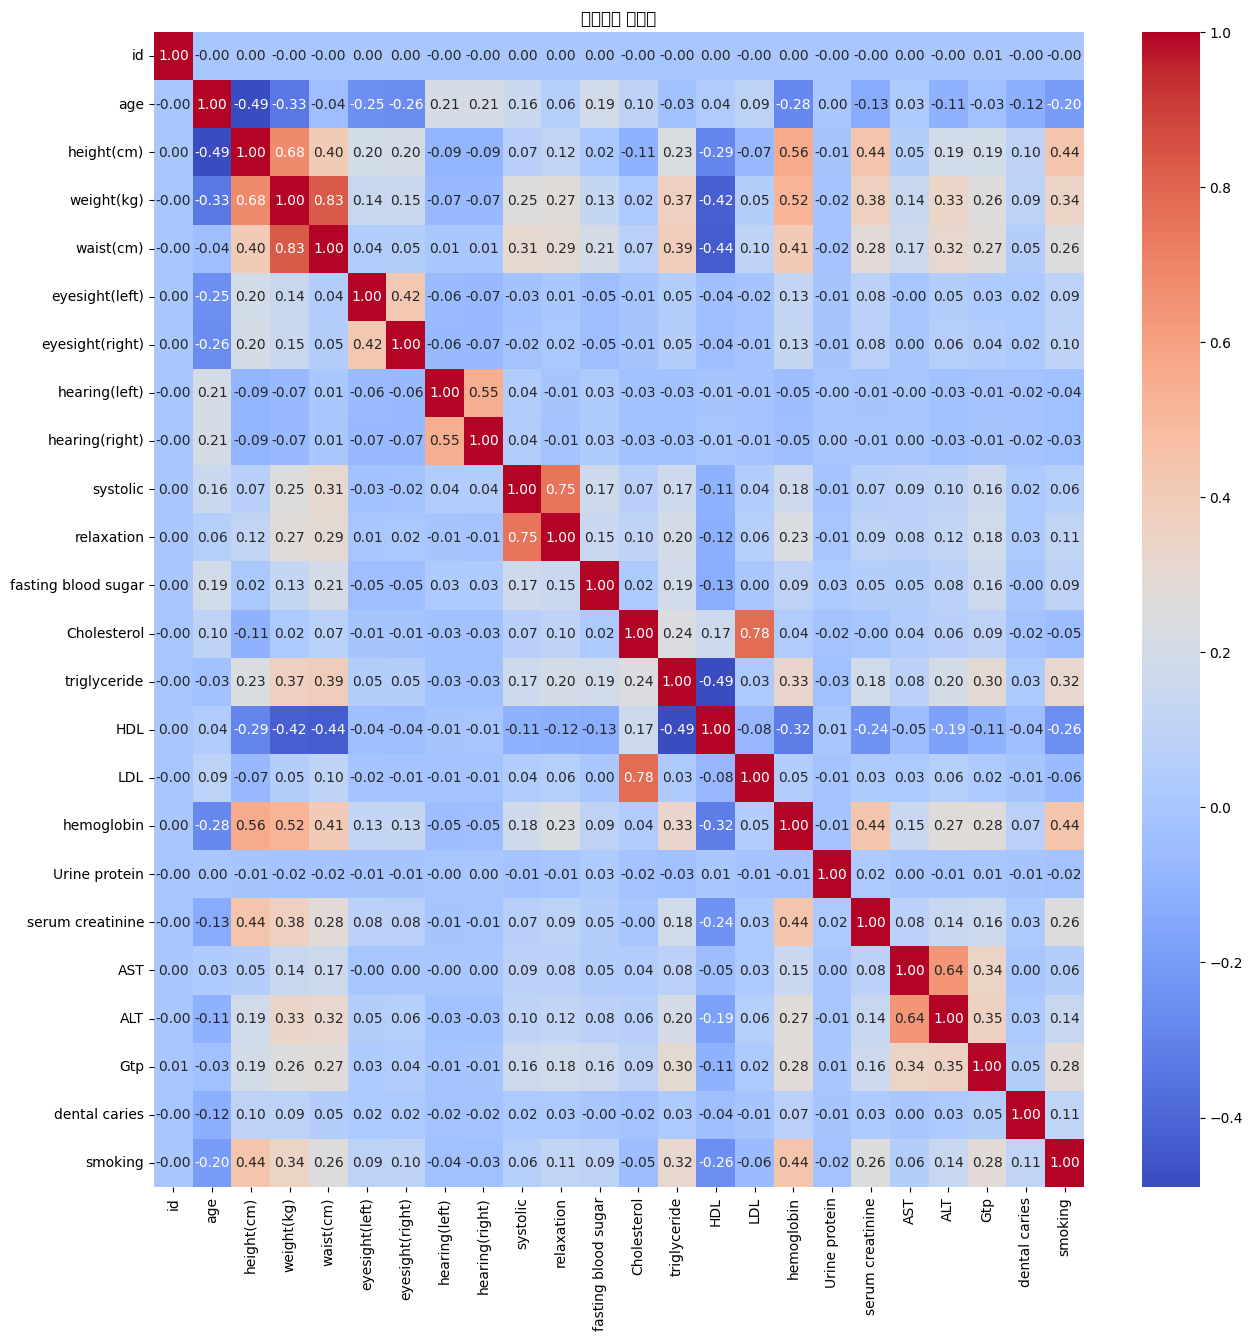

In [26]:
corr_matrix = final_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관관계 분석도')
plt.show()

- 상관관계가 높은 피쳐들이 별로 없음

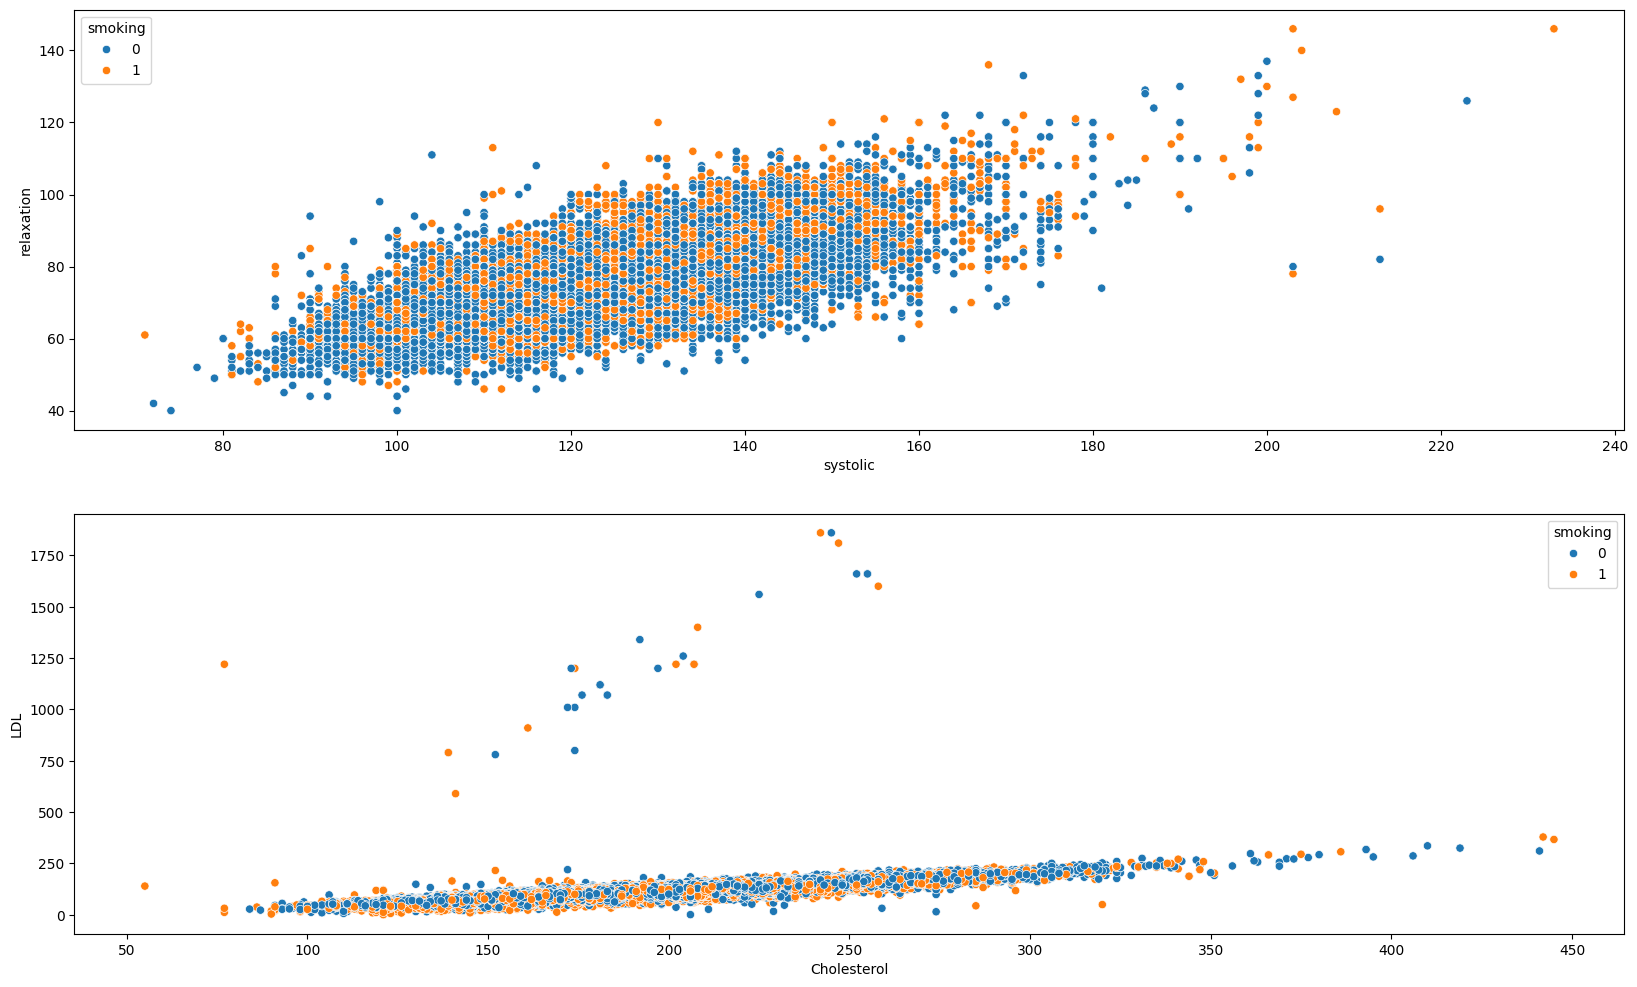

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(20,12))

sns.scatterplot(ax=axes[0], data=final_train, x='systolic', y='relaxation', hue='smoking')
sns.scatterplot(ax=axes[1], data=final_train, x='Cholesterol', y='LDL', hue='smoking')
plt.show()

#학습

## 데이터 분리

In [28]:
final_train.isna().sum()

id                     33467
age                        0
height(cm)                 0
weight(kg)                 0
waist(cm)                  0
eyesight(left)             0
eyesight(right)            0
hearing(left)              0
hearing(right)             0
systolic                   0
relaxation                 0
fasting blood sugar        0
Cholesterol                0
triglyceride               0
HDL                        0
LDL                        0
hemoglobin                 0
Urine protein              0
serum creatinine           0
AST                        0
ALT                        0
Gtp                        0
dental caries              0
smoking                    0
dtype: int64

In [72]:
def custom_split(train, test):
  tid = test['id']
  X = train.drop(columns=['smoking'])
  y = train['smoking']
  test = test.drop(columns=['id'])
  return tid, X, y, test

In [32]:
cp_train = final_train.copy().dropna()
cp_test = final_test.copy()
tid , X, y, split_test = custom_split(cp_train, cp_test)

In [33]:
X.shape, y.shape

((159256, 23), (159256,))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        test_size = 0.1, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143330, 23), (15926, 23), (143330,), (15926,))

In [ ]:
submission.shape

(106171, 2)

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as XGB
from xgboost import plot_importance
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### 여러모델 성능비교

In [44]:
models = {}

models['Logistic regression'] = LogisticRegression()

models['SVM'] = LinearSVC()

models['Decision Tree'] = DecisionTreeClassifier()

models['Random Forest'] = RandomForestClassifier()

models['Naive Bayes'] = GaussianNB()

models['K-Nearest Neighbor'] = KNeighborsClassifier()

models['Xgboost'] = XGBClassifier()

models['LightGBM'] = LGBMClassifier()

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

In [45]:
for key in models.keys():
  models[key].fit(X_train, y_train)

  predictions = models[key].predict(X_test)

  accuracy[key] = accuracy_score(predictions, y_test)
  precision[key] = precision_score(predictions, y_test)
  recall[key] = recall_score(predictions, y_test)
  y_pred = models[key].predict(X_test)
  auc = roc_auc_score(y_test, y_pred)
  print('Classification Report :', key)

  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
  print('ROC_AUC_SCORE is', roc_auc_score(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report : Logistic regression
ROC_AUC_SCORE is 0.7150631760768598


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report : SVM
ROC_AUC_SCORE is 0.5068420032998744
Classification Report : Decision Tree
ROC_AUC_SCORE is 0.6897539035765761
Classification Report : Random Forest
ROC_AUC_SCORE is 0.7828505749656665
Classification Report : Naive Bayes
ROC_AUC_SCORE is 0.7179671197752951
Classification Report : K-Nearest Neighbor
ROC_AUC_SCORE is 0.6608273629087388
Classification Report : Xgboost
ROC_AUC_SCORE is 0.7923850936026511
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 62538, number of negative: 80792
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2419
[LightGBM] [Info] Number of data points in the train set: 143330, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.436322 -> init

- XGB모델, LGBM모델의 성능이 가장 좋음
- 두모델 채택

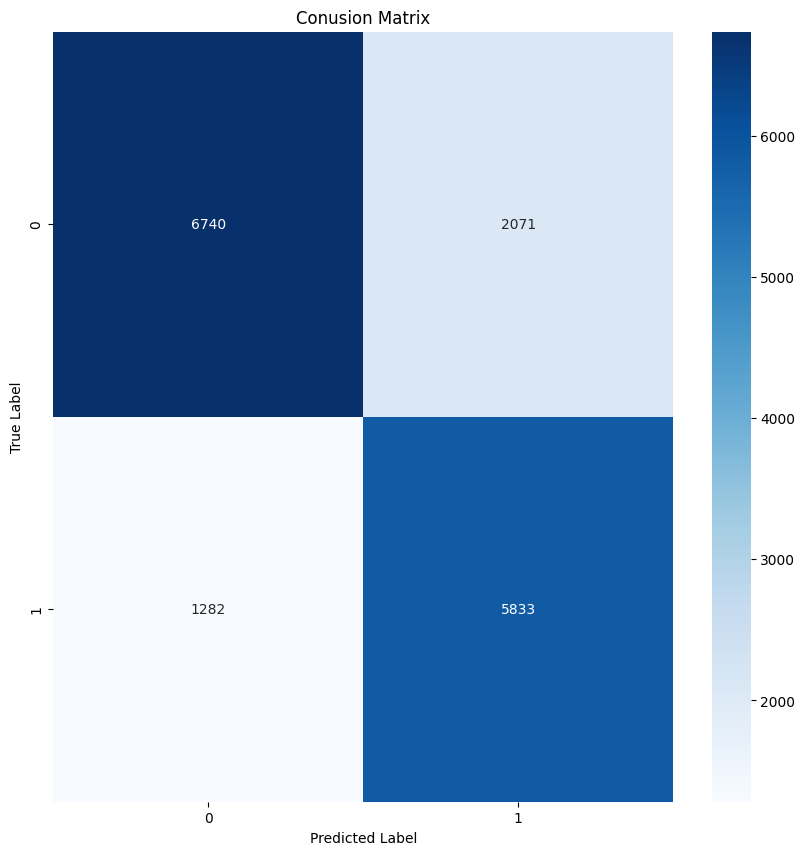

In [47]:
cm = confusion_matrix(y_test, models['Xgboost'].predict(X_test))

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Conusion Matrix')
plt.show()

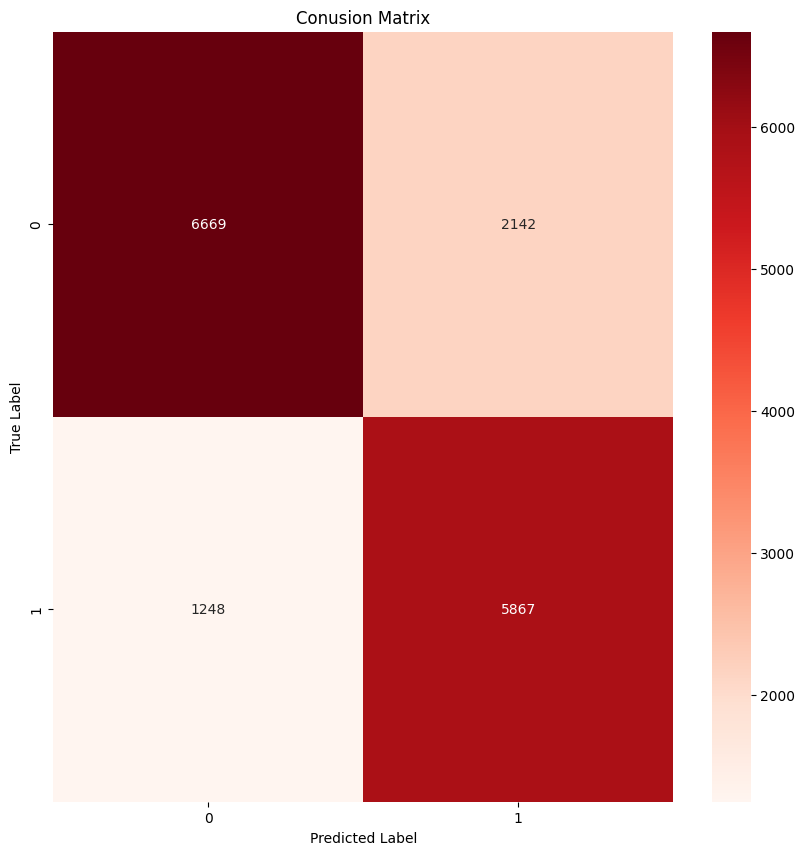

In [49]:
cm = confusion_matrix(y_test, models['LightGBM'].predict(X_test))

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Conusion Matrix')
plt.show()

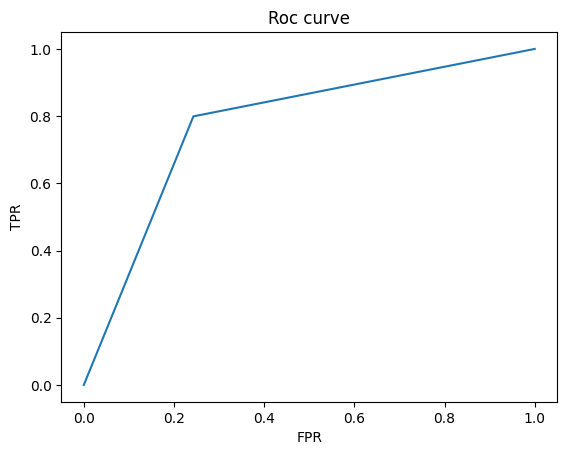

<Axes: >

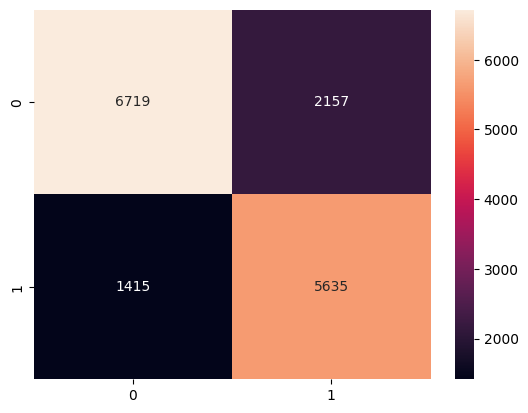

In [ ]:
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.title('Roc curve')
plt.show()
sns.heatmap(confusion_matrix(y_test, predictions), fmt='', annot=True)

##이상치 제거

In [51]:
def drop_outliers(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [52]:
cp_train = final_train.copy().dropna()
cp_test = final_test.copy()

for col in train.drop('id',axis=1).columns:
  if "hearing" in col or "Urine" in col or "dental" in col or "eyesight" in col:
    continue
  else:
    cp_train = drop_outliers(cp_train, col)

cp_train.shape, cp_train.shape

((118083, 24), (118083, 24))

- hearing, Urine protein, dental caries, eyesight를 제외한 나머지컬럼에 대해 이상치 제거 진행

In [53]:
tid, X, y, split_test = custom_split(cp_train, cp_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
tid=cp_test['id']
X = train.drop(columns=['smoking', 'id'])
y = train['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [54]:
XGB_model =XGB.XGBClassifier(n_estimators=200, random_state=0)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [60]:
y_pred = XGB_model.predict_proba(cp_test)[:,1]

XGB_roc_auc = roc_auc_score(y_test, XGB_model.predict_proba(X_test)[:,1])
print("XGB_ROC AUC:" ,XGB_roc_auc)

XGB_ROC AUC: 0.8543379295374607


In [61]:
submission_df = pd.DataFrame({
    'id' : tid,
    'smoking' : y_pred
})

submission_df.to_csv('XGB_outlier_sub.csv', index=False)

- 프라이빗 0.84987 퍼블릭 0.84787

###LightGBM

In [62]:
from lightgbm import LGBMClassifier

In [64]:
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
LGBM_model = LGBMClassifier(n_estimators=200, random_state=0)
LGBM_model.fit(X_train, y_train)
y_pred = LGBM_model.predict_proba(test)[:,1]

LGBM_roc_auc = roc_auc_score(y_test, LGBM_model.predict_proba(X_test)[:,1])
print("LGBM_ROC AUC:" ,LGBM_roc_auc)
submission_df = pd.DataFrame({
    'id' : tid,
    'smoking' : y_pred
})

submission_df.to_csv('LGBM_outlier_sub.csv', index=False)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 43777, number of negative: 62497
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1622
[LightGBM] [Info] Number of data points in the train set: 106274, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.411926 -> initscore=-0.356010
[LightGBM] [Info] Start training from score -0.356010
LGBM_ROC AUC: 0.8556425225192048


- LGBM 이상치 제거전 : 프라이빗 0.86699, 퍼블릭 0.86840
- LGBM 이상치 제거후 : 프라이빗 0.86123, 퍼블릭 0.86059
- XGB 보다 나은 성능, 이상치를 제거하면 성능이 떨어짐

### K-Fold 교차검증

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [73]:
train_data = final_train.copy()
test_data = final_test.copy()
tid, X, y, split_test = custom_split(train_data, test_data)

#### XGB

In [74]:

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

y_pred_list = []
y_true_list = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    XGB_model = XGBClassifier(n_estimators=200, random_state=42)
    XGB_model.fit(X_train, y_train)

    y_pred = XGB_model.predict_proba(X_test)[:, 1]

    y_pred_list.extend(y_pred)
    y_true_list.extend(y_test)

roc_auc = roc_auc_score(y_true_list, y_pred_list)
print("K-fold ROC AUC:", roc_auc)


K-fold ROC AUC: 0.863973729067053


In [79]:
y_pred = XGB_model.predict_proba(test)[:,1]

In [ ]:
submission_df = pd.DataFrame({
    'id' : tid,
    'smoking' : y_pred
})

submission_df.to_csv('XGB_outlier_kfold_sub.csv', index=False)


- kfold교차검증 XGB모델 : 프라이빗 0.86569, 퍼블릭 0.86683
- split수를 5->10으로 늘려 성능이 0.001, 0.0005늘었음

In [80]:

skfolds = StratifiedKFold(n_splits = 10, shuffle=True, random_state = 42)

y_pred_list = []
y_true_list = []

for train_index, test_index in skfolds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    XGB_model = XGBClassifier(n_estimators=200, random_state=42)
    XGB_model.fit(X_train, y_train)

    y_pred = XGB_model.predict_proba(X_test)[:, 1]

    y_pred_list.extend(y_pred)
    y_true_list.extend(y_test)

roc_auc = roc_auc_score(y_true_list, y_pred_list)
print("SK-fold ROC AUC:", roc_auc)

SK-fold ROC AUC: 0.8641130949677989


In [81]:
y_pred = XGB_model.predict_proba(test)[:,1]

submission_df = pd.DataFrame({
    'id' : tid,
    'smoking' : y_pred
})

submission_df.to_csv('XGB_outlier_skfold_sub.csv', index=False)


- SK-Fold : 프라이빗 0.86465, 퍼블릭 0.86701
- 단순 k-fold보다 미미하게 좋은 성능을 보임

#### LGBM

In [82]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

y_pred_list = []
y_true_list = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    LGBM_model = LGBMClassifier(n_estimators=200, random_state=42)
    LGBM_model.fit(X_train, y_train)

    y_pred = LGBM_model.predict_proba(X_test)[:, 1]

    y_pred_list.extend(y_pred)
    y_true_list.extend(y_test)

roc_auc = roc_auc_score(y_true_list, y_pred_list)
print("K-fold LGBM ROC AUC:", roc_auc)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 73669, number of negative: 99781
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2630
[LightGBM] [Info] Number of data points in the train set: 173450, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.424728 -> initscore=-0.303396
[LightGBM] [Info] Start training from score -0.303396
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 73658, number of negative: 99792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2634
[LightGBM] [In

In [84]:
y_pred = LGBM_model.predict_proba(test)[:,1]
submission_df = pd.DataFrame({
    'id' : tid,
    'smoking' : y_pred
})

submission_df.to_csv('LGBM_outlier_kfold_sub.csv', index=False)


- K-fold LGBM : 프라이빗 0.86685, 퍼블릭 0.86749

In [85]:
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

y_pred_list = []
y_true_list = []

for train_index, test_index in skfolds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    LGBM_model = LGBMClassifier(n_estimators=200, random_state=42)
    LGBM_model.fit(X_train, y_train)

    y_pred = LGBM_model.predict_proba(X_test)[:, 1]

    y_pred_list.extend(y_pred)
    y_true_list.extend(y_test)

roc_auc = roc_auc_score(y_true_list, y_pred_list)
print("SK-fold LGBM ROC AUC:", roc_auc)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 73719, number of negative: 99731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2626
[LightGBM] [Info] Number of data points in the train set: 173450, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.425016 -> initscore=-0.302216
[LightGBM] [Info] Start training from score -0.302216
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 73720, number of negative: 99730
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2626
[LightGBM] [In

In [86]:
y_pred = LGBM_model.predict_proba(test)[:,1]
submission_df = pd.DataFrame({
    'id' : tid,
    'smoking' : y_pred
})

submission_df.to_csv('LGBM_outlier_skfold_sub.csv', index=False)


- SK-Fold LGBM : 프라이빗 0.86674 ,퍼블릭 0.86790

### 피쳐 추가

In [87]:
add_ft_train = final_train
add_ft_test = final_test
add_ft_train.shape, add_ft_test.shape

((192723, 24), (106171, 23))

In [88]:
add_ft_train.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

#### BMI

- weight / (height/100)^2

In [89]:
add_ft_train['BMI'] = add_ft_train['weight(kg)']/((add_ft_train['height(cm)']/100)**2)
add_ft_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192723 entries, 0 to 38983
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  float64
 1   age                  192723 non-null  int64  
 2   height(cm)           192723 non-null  int64  
 3   weight(kg)           192723 non-null  int64  
 4   waist(cm)            192723 non-null  float64
 5   eyesight(left)       192723 non-null  float64
 6   eyesight(right)      192723 non-null  float64
 7   hearing(left)        192723 non-null  int64  
 8   hearing(right)       192723 non-null  int64  
 9   systolic             192723 non-null  int64  
 10  relaxation           192723 non-null  int64  
 11  fasting blood sugar  192723 non-null  int64  
 12  Cholesterol          192723 non-null  int64  
 13  triglyceride         192723 non-null  int64  
 14  HDL                  192723 non-null  int64  
 15  LDL                  19

<ipython-input-89-485b95f44bae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_ft_train['BMI'] = add_ft_train['weight(kg)']/((add_ft_train['height(cm)']/100)**2)


In [90]:
add_ft_test['BMI'] = add_ft_test['weight(kg)']/((add_ft_test['height(cm)']/100)**2)
add_ft_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106171 non-null  int64  
 1   age                  106171 non-null  int64  
 2   height(cm)           106171 non-null  int64  
 3   weight(kg)           106171 non-null  int64  
 4   waist(cm)            106171 non-null  float64
 5   eyesight(left)       106171 non-null  float64
 6   eyesight(right)      106171 non-null  float64
 7   hearing(left)        106171 non-null  int64  
 8   hearing(right)       106171 non-null  int64  
 9   systolic             106171 non-null  int64  
 10  relaxation           106171 non-null  int64  
 11  fasting blood sugar  106171 non-null  int64  
 12  Cholesterol          106171 non-null  int64  
 13  triglyceride         106171 non-null  int64  
 14  HDL                  106171 non-null  int64  
 15  LDL              

In [91]:
add_ft_train.shape, add_ft_test.shape

((192723, 25), (106171, 24))

In [92]:
tid, X, y, split_test = custom_split(add_ft_train, add_ft_test)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((173450, 24), (19273, 24), (173450,), (19273,))

In [98]:
skfolds = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

y_pred_list = []
y_true_list = []

for train_index, test_index in skfolds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    LGBM_model = LGBMClassifier(n_estimators=400, random_state=42)
    LGBM_model.fit(X_train, y_train)

    y_pred = LGBM_model.predict_proba(X_test)[:, 1]

    y_pred_list.extend(y_pred)
    y_true_list.extend(y_test)

roc_auc = roc_auc_score(y_true_list, y_pred_list)
print("SK-fold LGBM ROC AUC:", roc_auc)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 77815, number of negative: 105271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.153988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2777
[LightGBM] [Info] Number of data points in the train set: 183086, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.425019 -> initscore=-0.302204
[LightGBM] [Info] Start training from score -0.302204
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 77815, number of negative: 105271
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2783
[LightGBM] [

In [100]:
y_pred = LGBM_model.predict_proba(add_ft_test)[:,1]
submission_df = pd.DataFrame({
    'id' : tid,
    'smoking' : y_pred
})

submission_df.to_csv('LGBM_skfold_BMI_sub.csv', index=False)


- BMI추가 : 프라이빗 0.86756, 퍼블릭 0.86865 -> 781등
- 0.1씩 올라감
- n-estimator, n-splits 증가 -> 프라이빗 0.86923, 퍼블릭 0.87059 -> 618등

In [101]:
import lightgbm as lgb

In [102]:
feature_importance = LGBM_model.feature_importances_
feature_names = LGBM_model.feature_name_
for i, importance in enumerate(feature_importance):
    feature_name = feature_names[i]
    print(f"Feature {feature_name}: Importance = {importance}")

Feature id: Importance = 738
Feature age: Importance = 593
Feature height(cm): Importance = 394
Feature weight(kg): Importance = 201
Feature waist(cm): Importance = 643
Feature eyesight(left): Importance = 305
Feature eyesight(right): Importance = 254
Feature hearing(left): Importance = 29
Feature hearing(right): Importance = 26
Feature systolic: Importance = 593
Feature relaxation: Importance = 518
Feature fasting_blood_sugar: Importance = 672
Feature Cholesterol: Importance = 695
Feature triglyceride: Importance = 996
Feature HDL: Importance = 587
Feature LDL: Importance = 737
Feature hemoglobin: Importance = 852
Feature Urine_protein: Importance = 40
Feature serum_creatinine: Importance = 385
Feature AST: Importance = 594
Feature ALT: Importance = 649
Feature Gtp: Importance = 925
Feature dental_caries: Importance = 86
Feature BMI: Importance = 488


- hearing, Urine protein, dental caries -> 중요도가 100을 넘지못함

- 제거후 성능이 가장 잘 나온 모델로 학습 시켜보았지만 성능이 떨어졌음

In [ ]:
final_train.drop(columns=['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries'], inplace=True)
final_test.drop(columns=['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries'], inplace=True)
final_train.shape, final_test.shape

<ipython-input-37-eddb8b674afc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train.drop(columns=['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries'], inplace=True)


((192723, 20), (106171, 19))

In [ ]:
final_train.columns, final_test.columns

(Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
        'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
        'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
        'serum creatinine', 'AST', 'ALT', 'Gtp', 'smoking'],
       dtype='object'),
 Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
        'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
        'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
        'serum creatinine', 'AST', 'ALT', 'Gtp'],
       dtype='object'))